## Menghubungkan ke Database

In [1]:
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as sqlio

conn = pg.connect( host='localhost', user='postgres', password='12345', dbname='SQL2dsu')

def run(query):
    df = pd.read_sql(query,conn)
    return df

'Sukses Menghubungkan ke Database'

OperationalError: FATAL:  password authentication failed for user "postgres"


## Membuat Tabel

In [ ]:
cur = conn.cursor()

cur.execute('''
    CREATE TABLE IF NOT EXISTS mahasiswa
    (id_mhs VARCHAR PRIMARY KEY not null,
    nama_depan VARCHAR,
    nama_belakang VARCHAR,
    jkel VARCHAR,
    email VARCHAR);
            
    CREATE TABLE IF NOT EXISTS matakuliah
    (kd_mk VARCHAR PRIMARY KEY not null,
    nama_mk VARCHAR,
    sks SMALLINT);
    
    CREATE TABLE IF NOT EXISTS penilaian
    (no_nilai SERIAL PRIMARY KEY not null,
    id_mhs VARCHAR references mahasiswa(id_mhs)
    on update cascade on delete cascade,
    kd_mk VARCHAR references matakuliah(kd_mk)
    on update cascade on delete cascade,
    formatif NUMERIC,
    uts NUMERIC,
    uas NUMERIC);
            ''')

conn.commit()
'Semua tabel berhasil dibuat'

'Semua tabel berhasil dibuat'

## Mengisi Tabel

In [ ]:
cur = conn.cursor()

cur.execute('''
    INSERT INTO mahasiswa
    (id_mhs, nama_depan, nama_belakang, jkel, email) 
    VALUES
    ('701', 'Bambang', 'Reno', 'L', 'bambang_reno@gmail.com'),
    ('702', 'Esti', 'Farida', 'P', 'esti_farida@yahoo.com'),
    ('703', 'Sugeng', 'Adi', 'L', 'sugeng_adi@yahoo.com'),
    ('704', 'Muhammad', 'Budiono', 'L', 'm_budiono@gmail.com'),
    ('705', 'Rini', 'Setiawati', 'P', 'rini_setiawati@gmail.com');
            
    INSERT INTO matakuliah
    (kd_mk, nama_mk, sks) 
    VALUES
    ('M01', 'Data Mining', 3),
    ('M02', 'Data Warehouse', 3),
    ('M03', 'Struktur Data', 4),
    ('M04', 'Pemrograman Visual', 4),
    ('M05', 'Analisis Pemrograman', 2);                    

    INSERT INTO penilaian
    (id_mhs, kd_mk, formatif, uts, uas) 
    VALUES
    ('701', 'M01', 72.98, 83.86, 76.62),
    ('702', 'M01', 73.21, 83.17, 88.53),
    ('703', 'M01', 82.25, 74.25, 67.34),
    ('704', 'M01', 83.74, 64.74, 59.43),
    ('705', 'M02', 86.21, 72.47, 78.34),
    ('701', 'M02', 82.98, 83.34, 84.42),
    ('702', 'M02', 77.98, 73.73, 66.63),
    ('703', 'M03', 85.21, 84.68, 85.55),
    ('704', 'M03', 79.91, 64.46, 78.32),
    ('705', 'M03', 90.31, 82.38, 97.43),
    ('701', 'M04', 82.88, 73.24, 76.65),
    ('702', 'M04', 82.91, 83.52, 69.47),
    ('703', 'M05', 82.41, 94.45, 79.55),
    ('704', 'M05', 70.21, 84.28, 97.63),
    ('705', 'M05', 72.91, 62.39, 58.85);                    
            ''')

conn.commit()
'Tabel berhasil diisi'

'Tabel karyawan berhasil diisi'

## Menampilkan tabel

In [ ]:
query = "SELECT * FROM mahasiswa"

data = sqlio.read_sql_query(query, conn)
print("Tabel Mahasiswa\n\n",data)

('701', 'Bambang', 'Reno', 'L', 'bambang_reno@gmail.com')
('702', 'Esti', 'Farida', 'P', 'esti_farida@yahoo.com')
('703', 'Sugeng', 'Adi', 'L', 'sugeng_adi@yahoo.com')
('704', 'Muhammad', 'Budiono', 'L', 'm_budiono@gmail.com')
('705', 'Rini', 'Setiawati', 'P', 'rini_setiawati@gmail.com')


In [ ]:
query = "SELECT * FROM matakuliah"

data = sqlio.read_sql_query(query, conn)
print("TabelMata Kuliah\n\n",data)

TabelMata Kuliah

   kd_mk               nama_mk  sks
0   M01           Data Mining    3
1   M02        Data Warehouse    3
2   M03         Struktur Data    4
3   M04    Pemrograman Visual    4
4   M05  Analisis Pemrograman    2


In [ ]:
query = "SELECT * FROM penilaian"

data = sqlio.read_sql_query(query, conn)
print("Tabel Penilaian\n\n",data)

Tabel Penilaian

     no_nilai id_mhs kd_mk  formatif    uts    uas
0          1    701   M01     72.98  83.86  76.62
1          2    702   M01     73.21  83.17  88.53
2          3    703   M01     82.25  74.25  67.34
3          4    704   M01     83.74  64.74  59.43
4          5    705   M02     86.21  72.47  78.34
5          6    701   M02     82.98  83.34  84.42
6          7    702   M02     77.98  73.73  66.63
7          8    703   M03     85.21  84.68  85.55
8          9    704   M03     79.91  64.46  78.32
9         10    705   M03     90.31  82.38  97.43
10        11    701   M04     82.88  73.24  76.65
11        12    702   M04     82.91  83.52  69.47
12        13    703   M05     82.41  94.45  79.55
13        14    704   M05     70.21  84.28  97.63
14        15    705   M05     72.91  62.39  58.85


## Select Statement

### Prefix pada Nama Kolom

In [ ]:
#SELECT (nama_tabel).(nama_kolom) FROM (nama_tabel);

query = ''' SELECT matakuliah.nama_mk FROM matakuliah
        '''

data = sqlio.read_sql_query(query, conn)
data

,nama_mk
0,Data Mining
1,Data Warehouse
2,Struktur Data
3,Pemrograman Visual
4,Analisis Pemrograman


### Alias Pada Kolom

In [ ]:
# SELECT (nama_kolom) AS (nama_kolom_baru) FROM (nama_tabel);
# SELECT (nama_kolom) (nama_kolom_baru) FROM (nama_tabel);

query = ''' SELECT nama_mk AS matkul FROM matakuliah
        '''

data = sqlio.read_sql_query(query, conn)
data

,matkul
0,Data Mining
1,Data Warehouse
2,Struktur Data
3,Pemrograman Visual
4,Analisis Pemrograman


### Menggabungkan Prefix dan Alias pada Kolom

In [ ]:
#SELECT (nama_tabel).(nama_kolom) as (nama_kolom_baru) FROM (nama_tabel);

query = ''' SELECT matakuliah.nama_mk AS matkul FROM matakuliah
        '''

data = sqlio.read_sql_query(query, conn)
data

,matkul
0,Data Mining
1,Data Warehouse
2,Struktur Data
3,Pemrograman Visual
4,Analisis Pemrograman


### Prefix dan Alias pada Tabel

In [ ]:
# SELECT (nama_kolom) FROM (nama_tabel) AS (nama_tabel_baru);
# SELECT (nama_tabel_baru).(nama_kolom) FROM (nama_tabel) AS (nama_tabel_baru);

query = ''' SELECT t1.nama_mk FROM matakuliah as t1
        '''

data = sqlio.read_sql_query(query, conn)
data

,nama_mk
0,Data Mining
1,Data Warehouse
2,Struktur Data
3,Pemrograman Visual
4,Analisis Pemrograman


### Kondisi Where

In [ ]:
# SELECT (nama_kolom) FROM (nama_tabel) WHERE (condition);

query = ''' SELECT nama_mk, sks 
            FROM matakuliah
            WHERE sks < 4
        '''

data = sqlio.read_sql_query(query, conn)
data

,nama_mk,sks
0,Data Mining,3
1,Data Warehouse,3
2,Analisis Pemrograman,2


### Operand 'OR'

In [ ]:
# SELECT (nama_kolom) FROM (nama_tabel) WHERE (condition1) OR (condition2);

query = ''' SELECT *
            FROM matakuliah
            WHERE sks > 3 OR kd_mk = 'M05'
        '''

data = sqlio.read_sql_query(query, conn)
data

,kd_mk,nama_mk,sks
0,M03,Struktur Data,4
1,M04,Pemrograman Visual,4
2,M05,Analisis Pemrograman,2


### Operand 'AND'

In [ ]:
# SELECT (nama_kolom) FROM (nama_tabel) WHERE (condition1) AND (condition2);

query = ''' SELECT * 
            FROM matakuliah
            WHERE sks > 3 AND kd_mk = 'M04'
        '''

data = sqlio.read_sql_query(query, conn)
data

,kd_mk,nama_mk,sks
0,M04,Pemrograman Visual,4


## ORDER BY

In [ ]:
# SELECT (nama_kolom) FROM (nama_tabel) ORDER BY (nama_kolom) ASC/DESC;

query = ''' SELECT * 
            FROM matakuliah
            ORDER BY kd_mk DESC
        '''

data = sqlio.read_sql_query(query, conn)
data

,kd_mk,nama_mk,sks
0,M05,Analisis Pemrograman,2
1,M04,Pemrograman Visual,4
2,M03,Struktur Data,4
3,M02,Data Warehouse,3
4,M01,Data Mining,3


## Fungsi Skalar Matematika

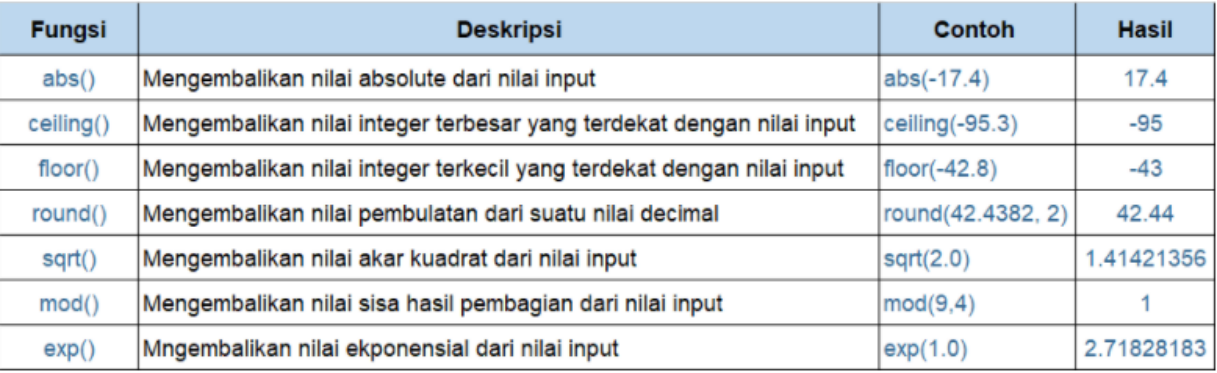

In [ ]:
from IPython.display import Image
Image("Fungsi skalar matematika.png")

In [ ]:
query = ''' SELECT formatif, ABS(formatif), CEILING(formatif), FLOOR(formatif),
            ROUND(formatif, 0), SQRT(formatif), MOD(formatif, 2), EXP(formatif)
            FROM penilaian
        '''
data = sqlio.read_sql_query(query, conn)
data

,formatif,abs,ceiling,floor,round,sqrt,mod,exp
0,72.98,72.98,73.0,72.0,73.0,8.542833,0.98,4.952350e+31
1,73.21,73.21,74.0,73.0,73.0,8.556284,1.21,6.233027e+31
2,82.25,82.25,83.0,82.0,82.0,9.069179,0.25,5.256796e+35
3,83.74,83.74,84.0,83.0,84.0,9.150956,1.74,2.332491e+36
4,86.21,86.21,87.0,86.0,86.0,9.284934,0.21,2.757575e+37
5,82.98,82.98,83.0,82.0,83.0,9.109336,0.98,1.090828e+36
6,77.98,77.98,78.0,77.0,78.0,8.830629,1.98,7.349938e+33
7,85.21,85.21,86.0,85.0,85.0,9.230926,1.21,1.014455e+37
8,79.91,79.91,80.0,79.0,80.0,8.939239,1.91,5.063748e+34
9,90.31,90.31,91.0,90.0,90.0,9.503157,0.31,1.663929e+39


## Fungsi Teks

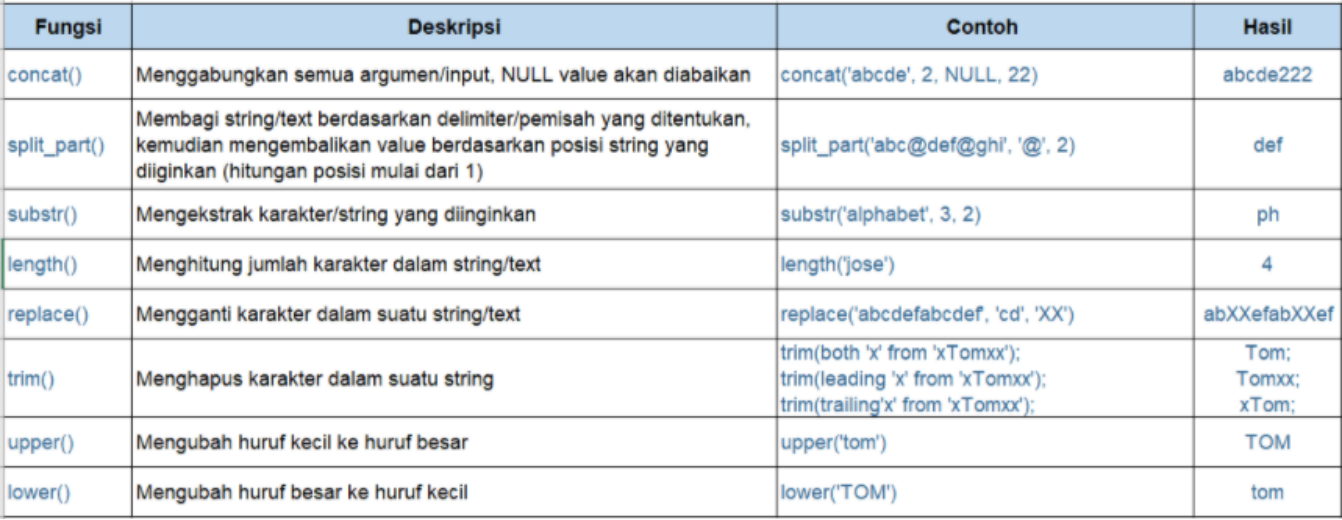

In [ ]:
from IPython.display import Image
Image("Fungsi text.png")

In [ ]:
# Concat
#query = ''' SELECT nama_depan, nama_belakang, concat(nama_depan,' ',nama_belakang) AS nama_lengkap FROM mahasiswa'''

# SPLIT_PART
#query = ''' SELECT email, SPLIT_PART(email, '@', 1)  as nama FROM mahasiswa'''

# SUBSTR
#query = ''' SELECT email, SUBSTR(email, 2, 5)  as nama FROM mahasiswa'''

# LENGTH
#query = ''' SELECT nama_depan, nama_belakang, LENGTH(concat(nama_depan,nama_belakang))  as jumlah_hurup FROM mahasiswa'''

#REPLACE
#query = ''' SELECT email, REPLACE(email, 'yahoo', 'gmail')  as email_baru FROM mahasiswa'''

#TRIM
#query = ''' SELECT email, TRIM(BOTH 'b' FROM email) as BOTH_TRIM FROM mahasiswa'''

#UPPER dan LOWER
#query = ''' SELECT UPPER(nama_depan), LOWER(nama_belakang) FROM mahasiswa'''

data = sqlio.read_sql_query(query, conn)
data

,email,nama
0,bambang_reno@gmail.com,bambang_reno
1,esti_farida@yahoo.com,esti_farida
2,sugeng_adi@yahoo.com,sugeng_adi
3,m_budiono@gmail.com,m_budiono
4,rini_setiawati@gmail.com,rini_setiawati


## Fungsi Agregate

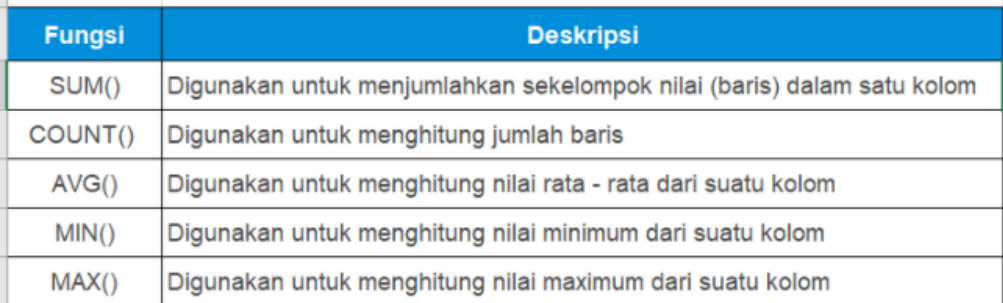

In [ ]:
from IPython.display import Image
Image("Fungsi agregate.png")

In [ ]:
#SUM
#query = ''' SELECT SUM(formatif) AS total_formatif FROM penilaian'''

#COUNT
#query = ''' SELECT COUNT(formatif) AS total_baris FROM penilaian'''

#AVERAGE
#query = ''' SELECT AVG(formatif) AS rata2_formatif FROM penilaian'''

#MAX MIN
#query = ''' SELECT MAX(formatif) AS formatif_terbesar, MIN(formatif) AS formatif_terkecil FROM penilaian'''

data = sqlio.read_sql_query(query, conn)
data

,formatif_terbesar,formatif_terkecil
0,90.31,70.21


## GROUP BY

In [ ]:
query = ''' select * from penilaian
        '''
data = sqlio.read_sql_query(query, conn)
data

,no_nilai,id_mhs,kd_mk,formatif,uts,uas
0,1,701,M01,72.98,83.86,76.62
1,2,702,M01,73.21,83.17,88.53
2,3,703,M01,82.25,74.25,67.34
3,4,704,M01,83.74,64.74,59.43
4,5,705,M02,86.21,72.47,78.34
5,6,701,M02,82.98,83.34,84.42
6,7,702,M02,77.98,73.73,66.63
7,8,703,M03,85.21,84.68,85.55
8,9,704,M03,79.91,64.46,78.32
9,10,705,M03,90.31,82.38,97.43


In [ ]:
#Jumlah mahasiswa yang mengambil matakuliah tertentu, dan rata2 nilai formatif dari matakuliah tersebut
query = ''' SELECT kd_mk,
            count(distinct id_mhs) as total_diambil,
            AVG(formatif) as rata2_formatif
            FROM penilaian
            GROUP BY kd_mk
        '''
data = sqlio.read_sql_query(query, conn)
data

,kd_mk,total_diambil,rata2_formatif
0,M01,4,78.045000
1,M02,3,82.390000
2,M03,3,85.143333
3,M04,2,82.895000
4,M05,3,75.176667


## Inner Join dan UNION

### Menggabungkan 2 tabel yang memiliki hubungan

In [ ]:
query = ''' SELECT * FROM matakuliah as t1, penilaian as t2 
            WHERE t1.kd_mk = t2.kd_mk
        '''
data = sqlio.read_sql_query(query, conn)
data

,kd_mk,nama_mk,sks,no_nilai,id_mhs,kd_mk,formatif,uts,uas
0,M01,Data Mining,3,1,701,M01,72.98,83.86,76.62
1,M01,Data Mining,3,2,702,M01,73.21,83.17,88.53
2,M01,Data Mining,3,3,703,M01,82.25,74.25,67.34
3,M01,Data Mining,3,4,704,M01,83.74,64.74,59.43
4,M02,Data Warehouse,3,5,705,M02,86.21,72.47,78.34
5,M02,Data Warehouse,3,6,701,M02,82.98,83.34,84.42
6,M02,Data Warehouse,3,7,702,M02,77.98,73.73,66.63
7,M03,Struktur Data,4,8,703,M03,85.21,84.68,85.55
8,M03,Struktur Data,4,9,704,M03,79.91,64.46,78.32
9,M03,Struktur Data,4,10,705,M03,90.31,82.38,97.43


### Inner Join

In [ ]:
query = ''' SELECT * FROM matakuliah
            INNER JOIN penilaian
            ON matakuliah.kd_mk = penilaian.kd_mk
        '''
data = sqlio.read_sql_query(query, conn)
data

,kd_mk,nama_mk,sks,no_nilai,id_mhs,kd_mk,formatif,uts,uas
0,M01,Data Mining,3,1,701,M01,72.98,83.86,76.62
1,M01,Data Mining,3,2,702,M01,73.21,83.17,88.53
2,M01,Data Mining,3,3,703,M01,82.25,74.25,67.34
3,M01,Data Mining,3,4,704,M01,83.74,64.74,59.43
4,M02,Data Warehouse,3,5,705,M02,86.21,72.47,78.34
5,M02,Data Warehouse,3,6,701,M02,82.98,83.34,84.42
6,M02,Data Warehouse,3,7,702,M02,77.98,73.73,66.63
7,M03,Struktur Data,4,8,703,M03,85.21,84.68,85.55
8,M03,Struktur Data,4,9,704,M03,79.91,64.46,78.32
9,M03,Struktur Data,4,10,705,M03,90.31,82.38,97.43


In [ ]:
# Membuat tabel baru
cur = conn.cursor()

cur.execute('''
    CREATE TABLE IF NOT EXISTS mahasiswa_pilihan
    (id_mhs VARCHAR PRIMARY KEY not null,
    nama_depan VARCHAR,
    nama_belakang VARCHAR,
    jkel VARCHAR,
    email VARCHAR);
    
    INSERT INTO mahasiswa_pilihan
    (id_mhs, nama_depan, nama_belakang, jkel, email) 
    VALUES
    ('501', 'Rendi', 'Guntara', 'L', 'rendi_guntara@gmail.com'),
    ('701', 'Bambang', 'Reno', 'L', 'bambang_reno@gmail.com'),
    ('702', 'Esti', 'Farida', 'P', 'esti_farida@yahoo.com'),
    ('802', 'Deni', 'Silaban', 'L', 'deni_silaban@yahoo.com'),
    ('805', 'Alan', 'Walker', 'L', 'alan_berjalan@gmail.com');
    ''')

conn.commit()
'Tabel berhasil diisi'

'Tabel berhasil diisi'

In [ ]:
query = ''' SELECT * FROM mahasiswa_pilihan
        '''
data = sqlio.read_sql_query(query, conn)
data

,id_mhs,nama_depan,nama_belakang,jkel,email
0,501,Rendi,Guntara,L,rendi_guntara@gmail.com
1,701,Bambang,Reno,L,bambang_reno@gmail.com
2,702,Esti,Farida,P,esti_farida@yahoo.com
3,802,Deni,Silaban,L,deni_silaban@yahoo.com
4,805,Alan,Walker,L,alan_berjalan@gmail.com


In [ ]:
query = ''' SELECT * FROM mahasiswa
            INNER JOIN mahasiswa_pilihan
            ON mahasiswa.id_mhs = mahasiswa_pilihan.id_mhs
        '''
data = sqlio.read_sql_query(query, conn)
data

,id_mhs,nama_depan,nama_belakang,jkel,email,id_mhs,nama_depan,nama_belakang,jkel,email
0,701,Bambang,Reno,L,bambang_reno@gmail.com,701,Bambang,Reno,L,bambang_reno@gmail.com
1,702,Esti,Farida,P,esti_farida@yahoo.com,702,Esti,Farida,P,esti_farida@yahoo.com


### Inner Join dengan 3 tabel

In [ ]:
# Menampilkan Nilai Rata2 dari Mahasiswa Pilihan
query = ''' SELECT CONCAT(t1.nama_depan, ' ', t1.nama_belakang) AS nama_lengkap,
            AVG(t3.formatif) AS rata2_formatif, AVG(t3.uts) AS rata2_uts, AVG(t3.uas) AS rata2_uas
            
            FROM mahasiswa AS t1
            
            INNER JOIN mahasiswa_pilihan AS t2
            ON t1.id_mhs = t2.id_mhs
            
            INNER JOIN penilaian AS t3
            ON t1.id_mhs = t3.id_mhs
            
            GROUP BY t1.id_mhs, t2.id_mhs, t3.id_mhs
            
        '''
data = sqlio.read_sql_query(query, conn)
data

,nama_lengkap,rata2_formatif,rata2_uts,rata2_uas
0,Bambang Reno,79.613333,80.146667,79.230000
1,Esti Farida,78.033333,80.140000,74.876667


### UNION

In [ ]:
query = ''' SELECT * FROM mahasiswa
            UNION
            SELECT * FROM mahasiswa_pilihan
        '''
data = sqlio.read_sql_query(query, conn)
data

,id_mhs,nama_depan,nama_belakang,jkel,email
0,805,Alan,Walker,L,alan_berjalan@gmail.com
1,802,Deni,Silaban,L,deni_silaban@yahoo.com
2,701,Bambang,Reno,L,bambang_reno@gmail.com
3,501,Rendi,Guntara,L,rendi_guntara@gmail.com
4,703,Sugeng,Adi,L,sugeng_adi@yahoo.com
5,704,Muhammad,Budiono,L,m_budiono@gmail.com
6,702,Esti,Farida,P,esti_farida@yahoo.com
7,705,Rini,Setiawati,P,rini_setiawati@gmail.com


### UNION dengan WHERE

In [ ]:
query = ''' SELECT * FROM mahasiswa
            WHERE jkel = 'L'
            UNION
            SELECT * FROM mahasiswa_pilihan
            WHERE jkel = 'L'
        '''
data = sqlio.read_sql_query(query, conn)
data

,id_mhs,nama_depan,nama_belakang,jkel,email
0,805,Alan,Walker,L,alan_berjalan@gmail.com
1,802,Deni,Silaban,L,deni_silaban@yahoo.com
2,701,Bambang,Reno,L,bambang_reno@gmail.com
3,703,Sugeng,Adi,L,sugeng_adi@yahoo.com
4,704,Muhammad,Budiono,L,m_budiono@gmail.com
5,702,Esti,Farida,P,esti_farida@yahoo.com
6,501,Rendi,Guntara,L,rendi_guntara@gmail.com


## HAVING
#### HAVING digunakan untuk menggantikan WHERE ketika menggunakan Group BY yang datanya di aggregasi.

In [ ]:
query = ''' SELECT kd_mk,
            count(distinct id_mhs) as total_diambil,
            AVG(formatif) as rata2_formatif
            FROM penilaian
            GROUP BY kd_mk
            HAVING AVG(formatif) > 80
        '''
data = sqlio.read_sql_query(query, conn)
data

,kd_mk,total_diambil,rata2_formatif
0,M02,3,82.390000
1,M03,3,85.143333
2,M04,2,82.895000


### Penggunaan MAX pada HAVING

In [ ]:
query = ''' SELECT id_mhs,
            count(distinct id_mhs) as total_diambil,
            MAX(formatif) as max_formatif
            FROM penilaian
            GROUP BY id_mhs
            HAVING MAX(formatif) > 85
        '''
data = sqlio.read_sql_query(query, conn)
data

,id_mhs,total_diambil,max_formatif
0,703,1,85.21
1,705,1,90.31
